# Polynomial Regression

## Importing the libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

## Importing the dataset

In [32]:
dataset = pd.read_csv('Position_Salaries.csv')
df = pd.DataFrame(dataset)
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [33]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_pred = lin_reg.predict(X)

## Training the Polynomial Regression model on the whole dataset

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_degree = PolynomialFeatures(degree = 2)
poly_reg_degree4 = PolynomialFeatures(degree = 4)
X_poly = poly_reg_degree.fit_transform(X)
X_poly2 = poly_reg_degree4.fit_transform(X)
poly_reg = LinearRegression()
poly_reg2 = LinearRegression()
poly_reg.fit(X_poly, y)
poly_reg2.fit(X_poly2, y)
poly_pred = poly_reg.predict(poly_reg_degree.fit_transform(X))
poly_pred2 = poly_reg2.predict(poly_reg_degree4.fit_transform(X))

## Visualising the Linear Regression results

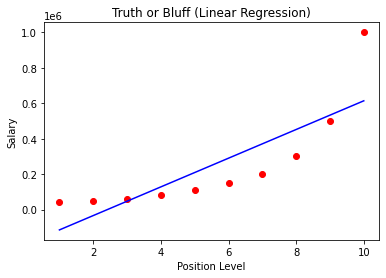

In [71]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_pred, color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## R2 and RMSE of Linear Regression 


In [72]:
rmse = np.sqrt(mean_squared_error(y, lin_pred))
r2 = r2_score(y, lin_pred)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse))
print("R2 score of training set is {}".format(r2))

The model performance for the training set
-------------------------------------------
RMSE of training set is 163388.73519272613
R2 score of training set is 0.6690412331929895


## Visualising the Polynomial Regression results

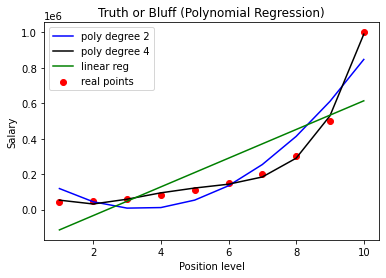

In [65]:
plt.scatter(X, y, color = 'red', label = 'real points')
plt.plot(X, poly_pred, color = 'blue', label = 'poly degree 2')
plt.plot(X, poly_pred2, color = 'black', label = 'poly degree 4')
plt.plot(X, lin_pred, color = 'green', label = 'linear reg')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

## R2 and RMSE for Polynomial Regression


In [70]:
rmse = np.sqrt(mean_squared_error(y, poly_pred)) 
r2 = r2_score(y, poly_pred)

print("The model performance degree = 2") 
print("-------------------------------------------") 
print("RMSE of training set is {}".format(rmse)) 
print("R2 score of training set is {}".format(r2))

rmsedeg4 = np.sqrt(mean_squared_error(y, poly_pred2)) 
r2deg4 = r2_score(y, poly_pred2)

print("The model performance degree = 4") 
print("-------------------------------------------") 
print("RMSE of training set is {}".format(rmsedeg4)) 
print("R2 score of training set is {}".format(r2deg4))

The model performance degree = 2
-------------------------------------------
RMSE of training set is 82212.12400451247
R2 score of training set is 0.9162082221443942
The model performance degree = 4
-------------------------------------------
RMSE of training set is 14503.234909626732
R2 score of training set is 0.9973922891706615
